# LAB- 3

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type","num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]


In [4]:
df=pd.read_csv(path,names=headers,na_values=["?"])
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
df.replace("?",np.nan)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [33]:
outliers = []
for feature in df.select_dtypes(include=np.number).columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    if df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].any(axis=None):
        outliers.append(feature)

print("Attributes with outliers:", outliers)

Attributes with outliers: ['normalized-losses', 'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [11]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [17]:
df.dropna(subset = ['price'], inplace=True, axis=0)

In [32]:
df["peak-rpm"].bfill() #before fill
df["horsepower"].ffill() #after fill

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 201, dtype: float64

In [23]:
mean = df["stroke"].mean()    #replace by mean
df["stroke"].replace(np.nan,mean,inplace=True)

In [24]:
mean = df["bore"].mean()    #replace by mean
df["bore"].replace(np.nan,mean,inplace=True)

In [30]:
median = df["normalized-losses"].median()    #replace by median because there are outliers in this column
df["normalized-losses"].replace(np.nan,median,inplace=True)

In [31]:
mode = df["num-of-doors"].mode()[0]    #replace by mode cuz it's categorical value
df["num-of-doors"].replace(np.nan,mode,inplace=True)

In [50]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
if 'price' in numerical_columns:
    numerical_columns.remove('price')
numerical_columns

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

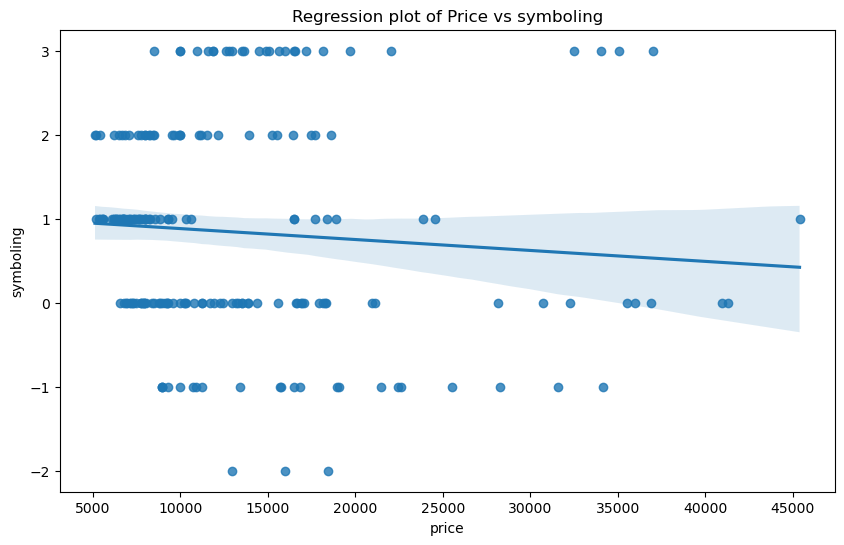

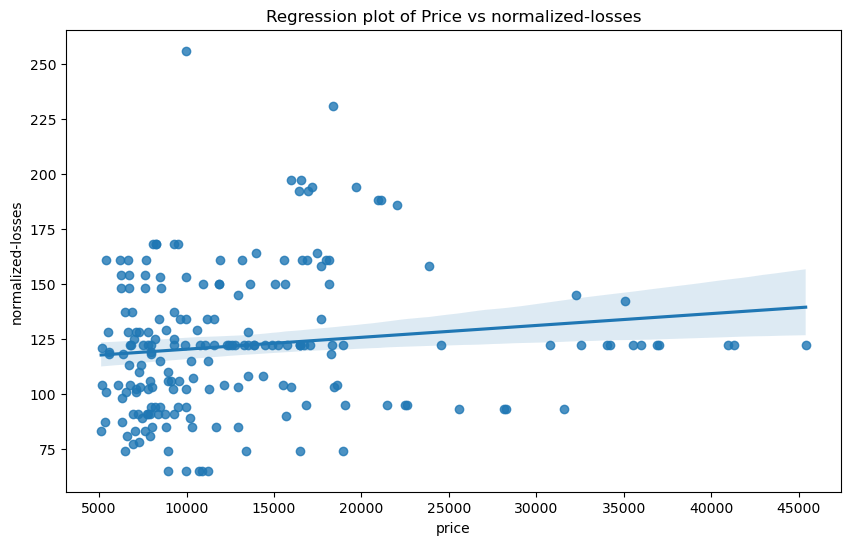

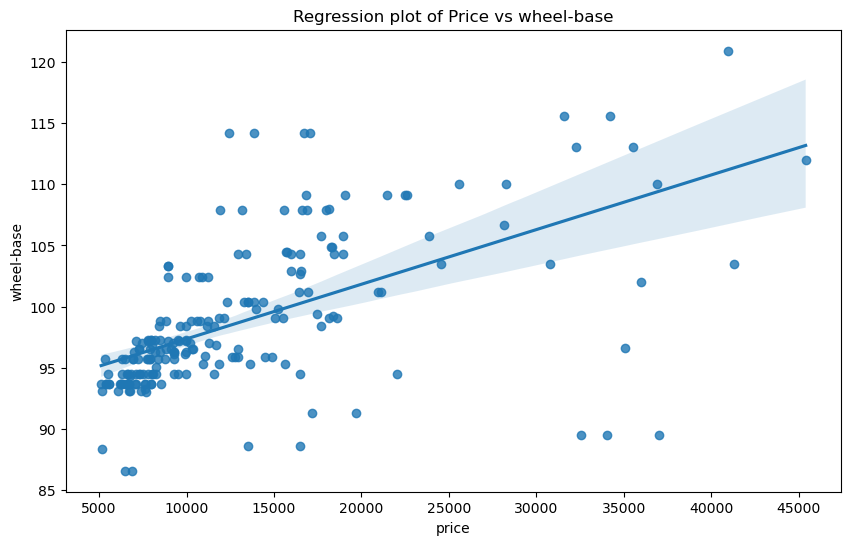

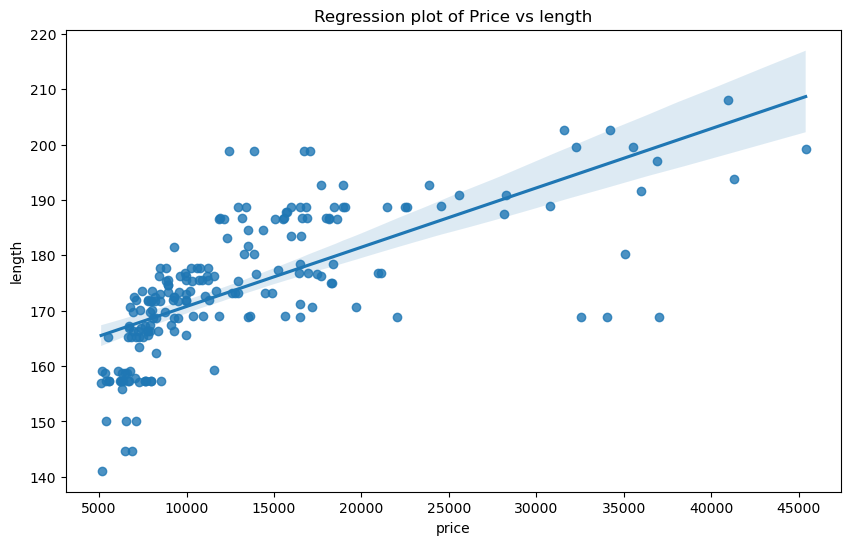

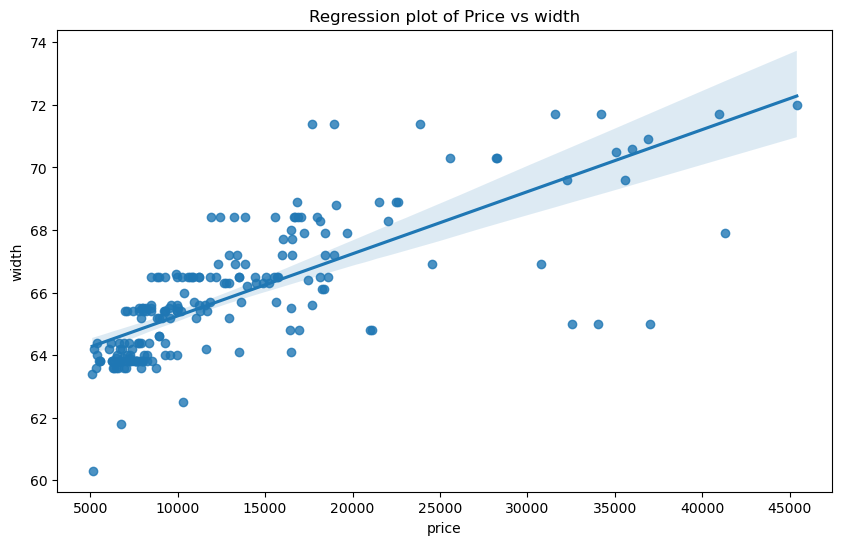

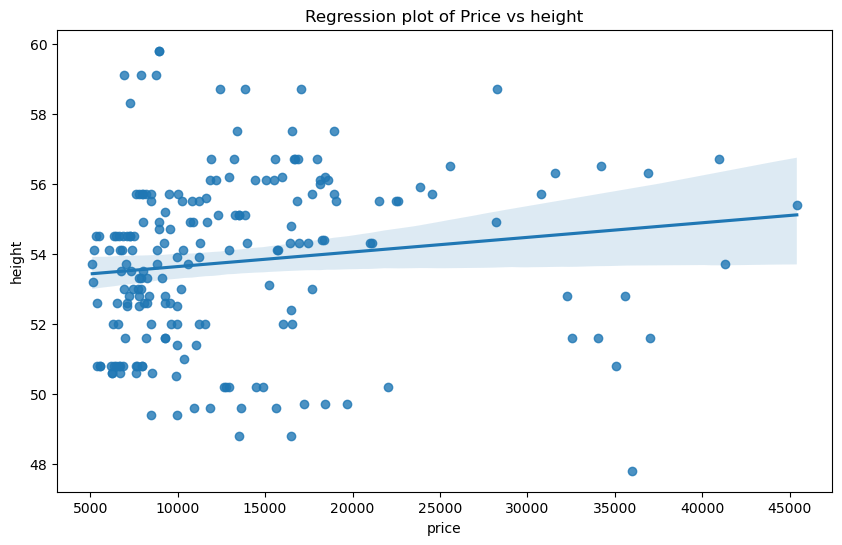

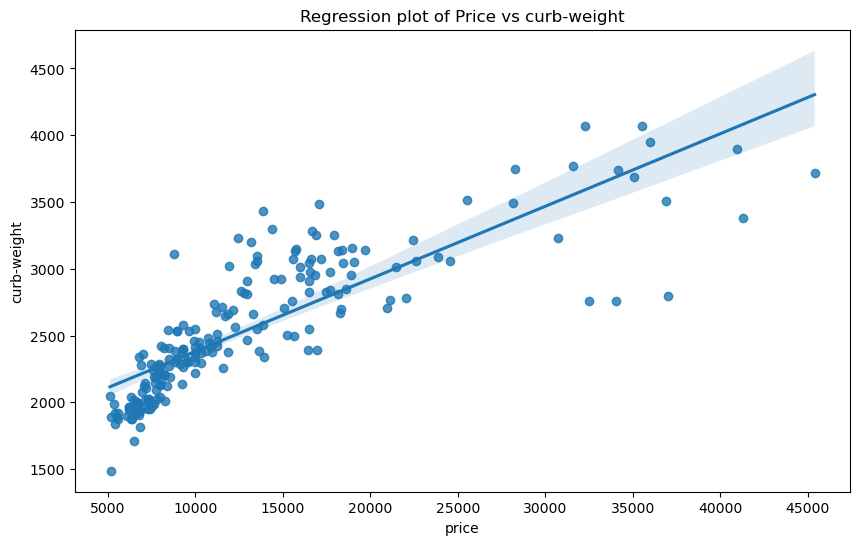

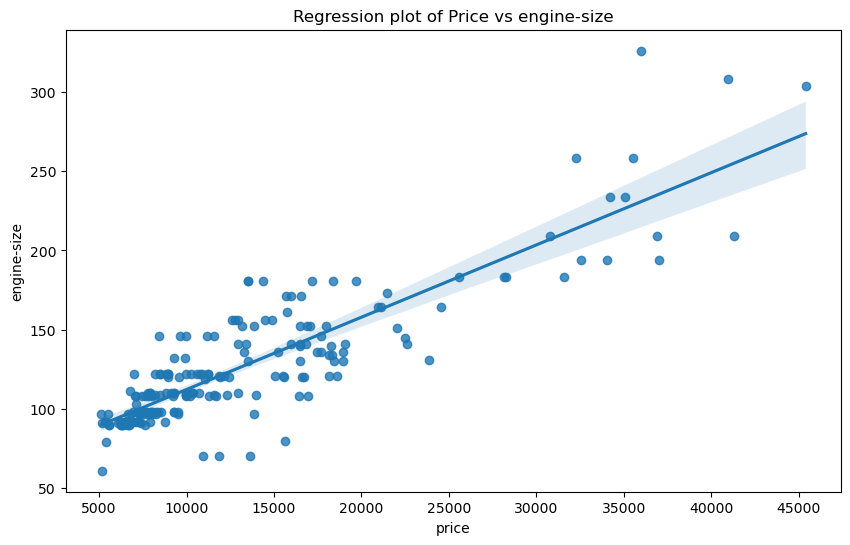

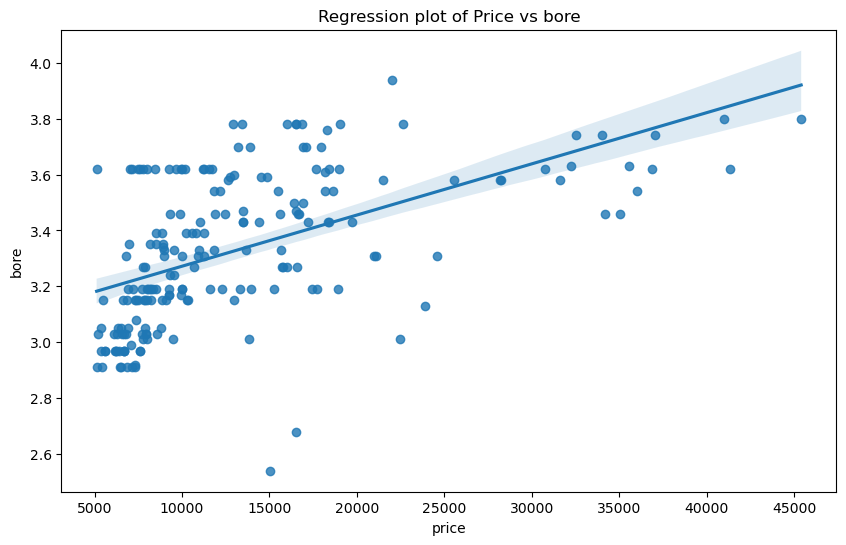

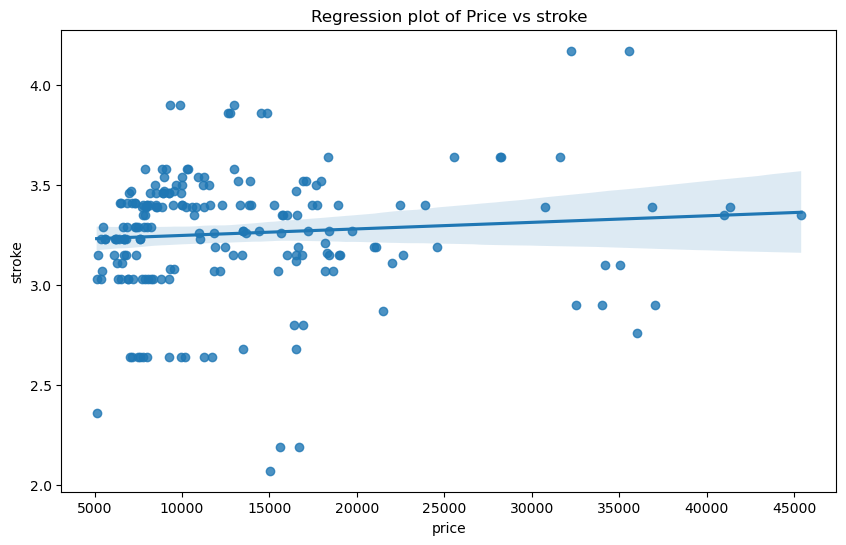

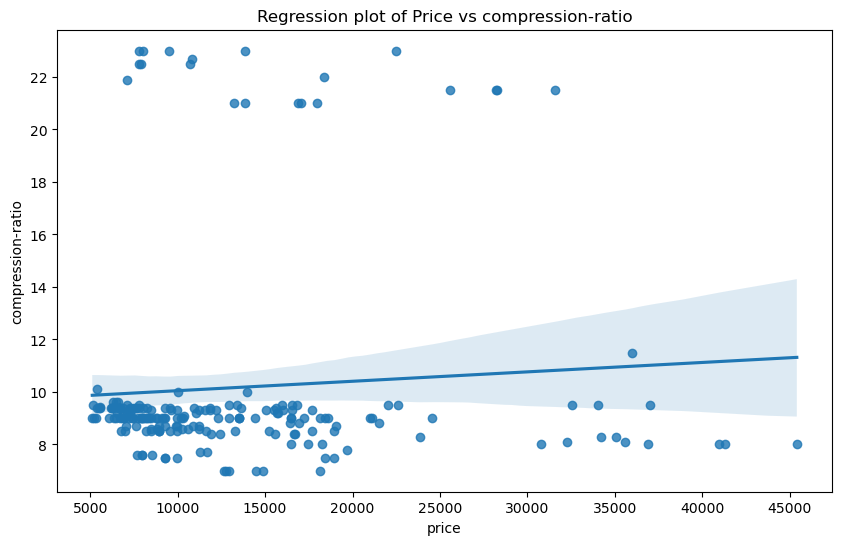

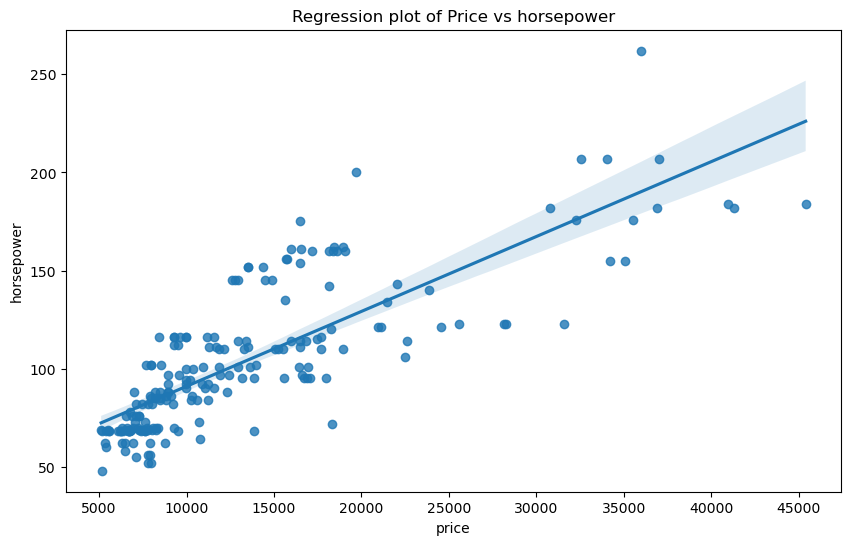

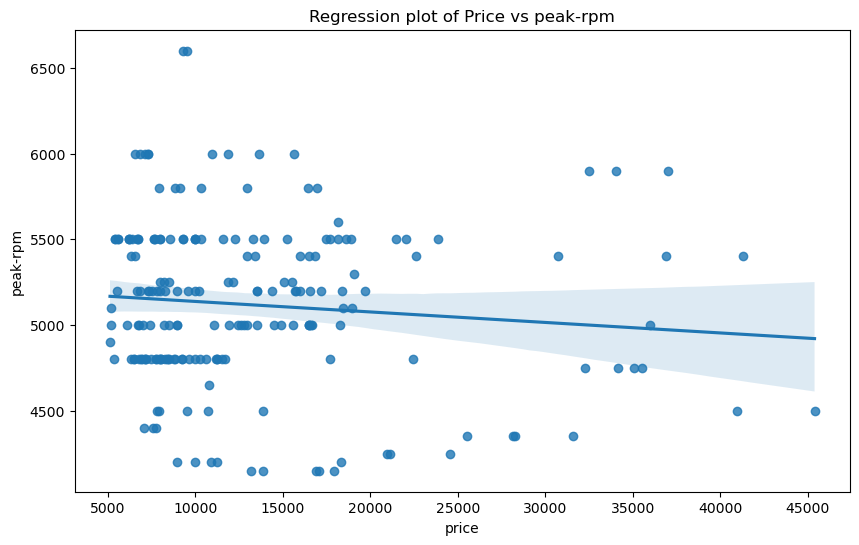

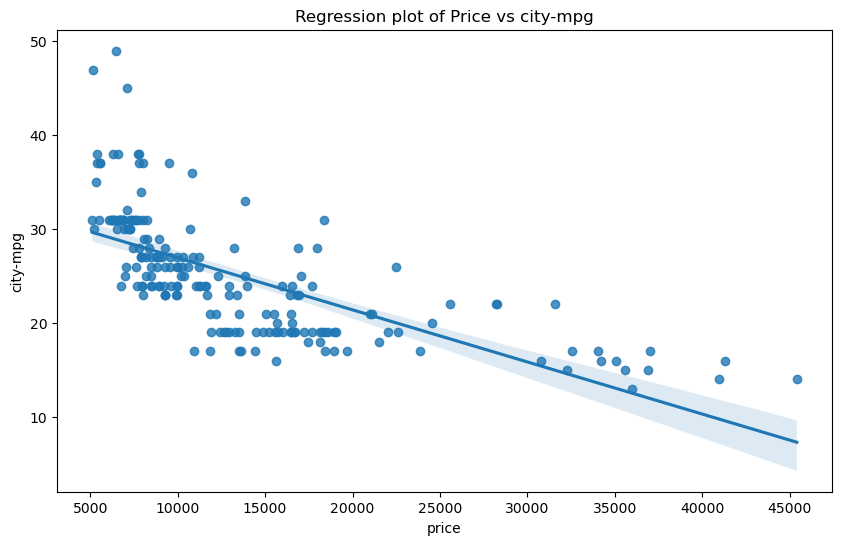

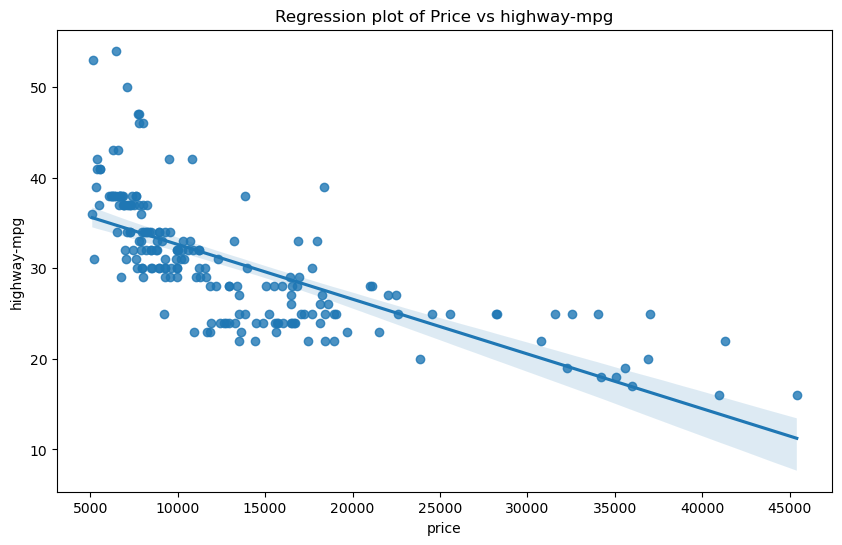

In [44]:
for col in numerical_columns:       #regplot for all the numerical columns
    plt.figure(figsize=(10, 6))
    sns.regplot(x='price', y=col, data=df)
    plt.title(f'Regression plot of Price vs {col}')
    plt.show()

In [47]:
pearson_coefficients = df[numerical_columns].corrwith(df['price'])
print("Pearson Correlation Coefficients with 'price':\n")
print(pearson_coefficients)

Pearson Correlation Coefficients with 'price':

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543154
stroke               0.082267
compression-ratio    0.071107
horsepower           0.810533
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
dtype: float64


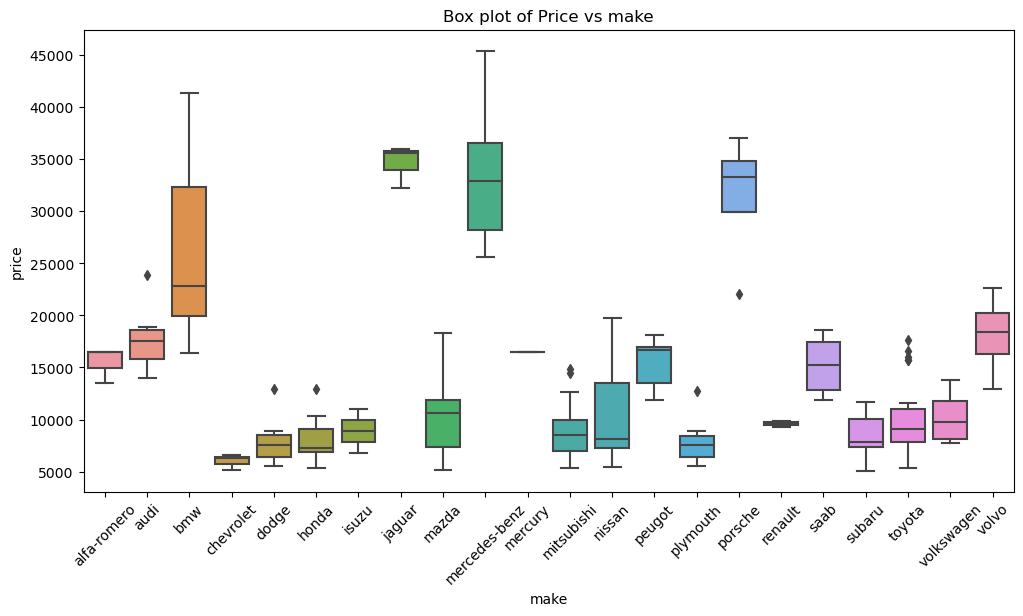

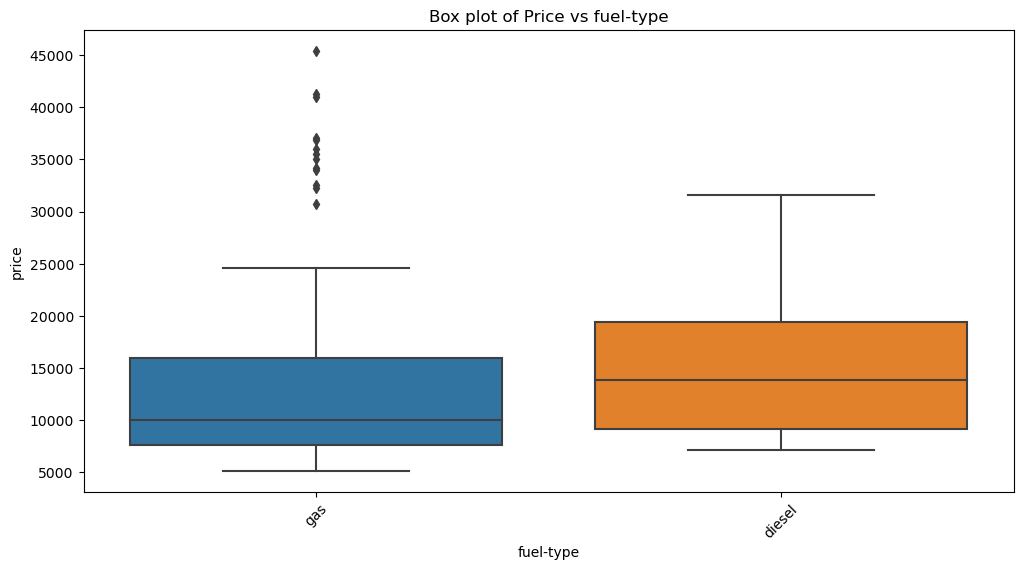

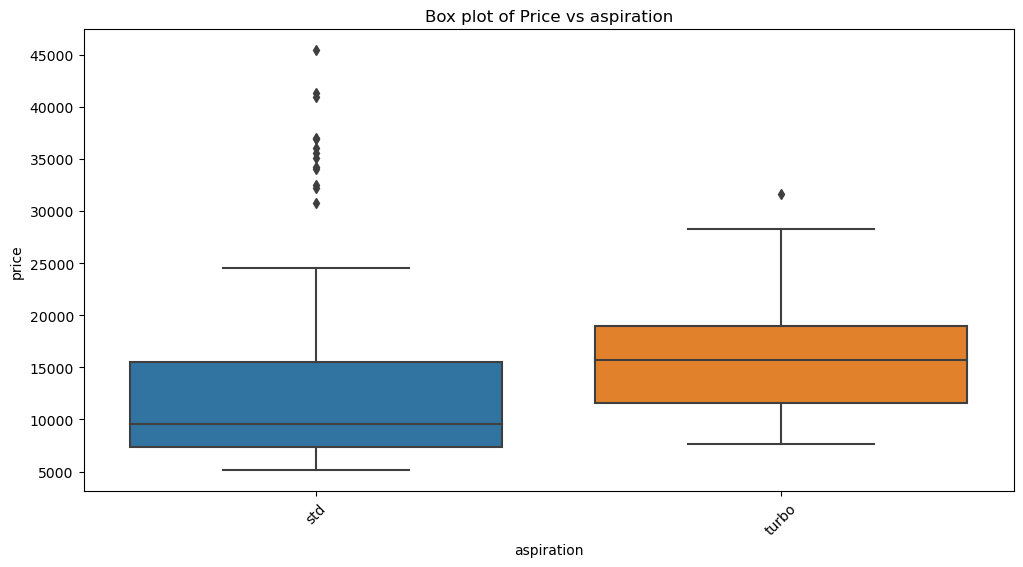

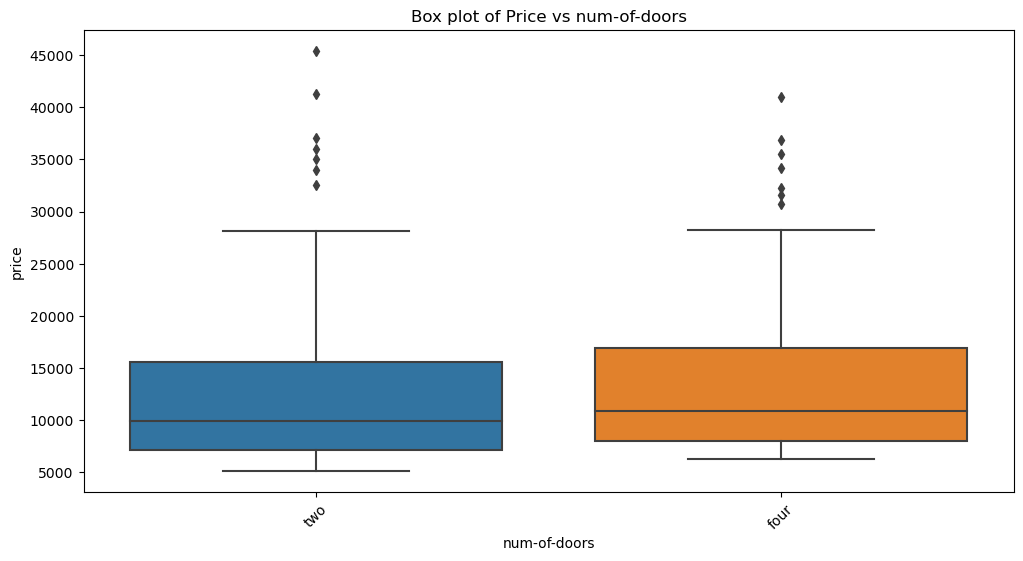

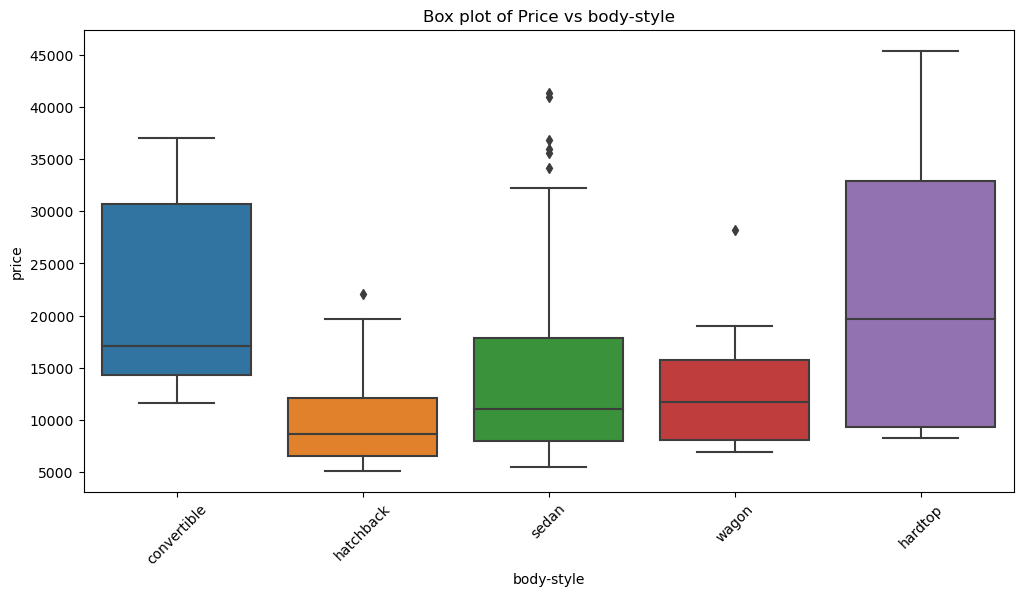

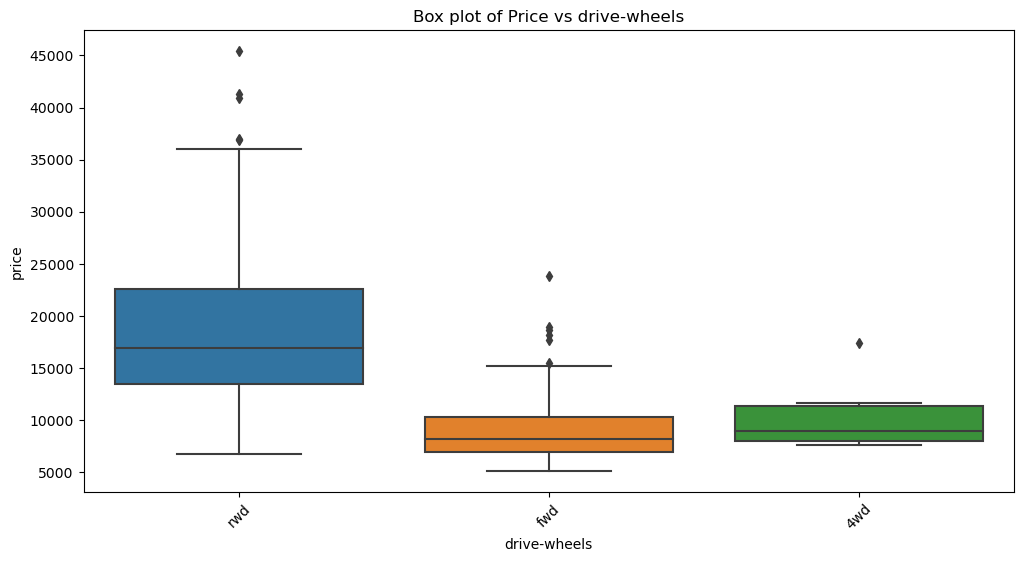

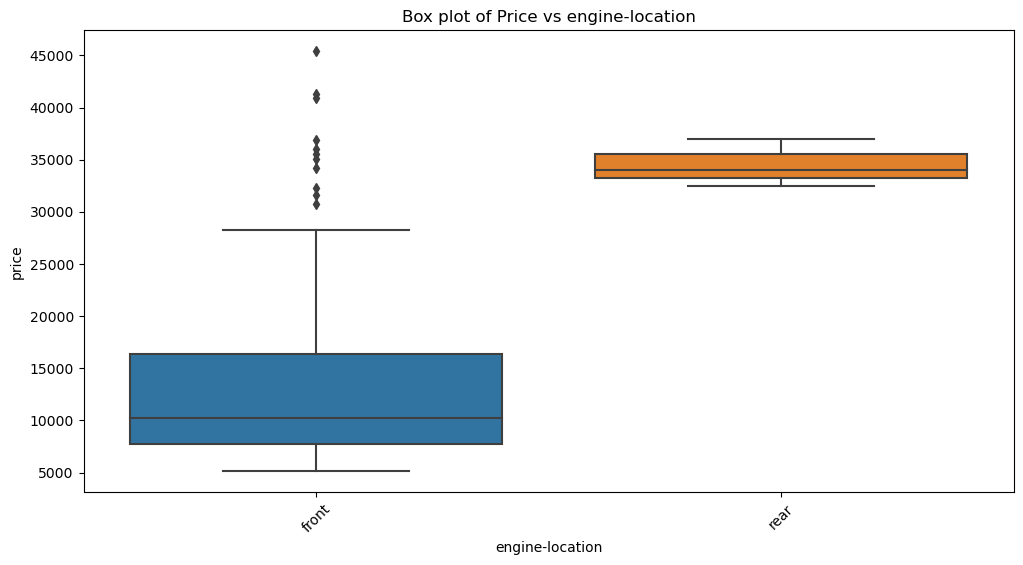

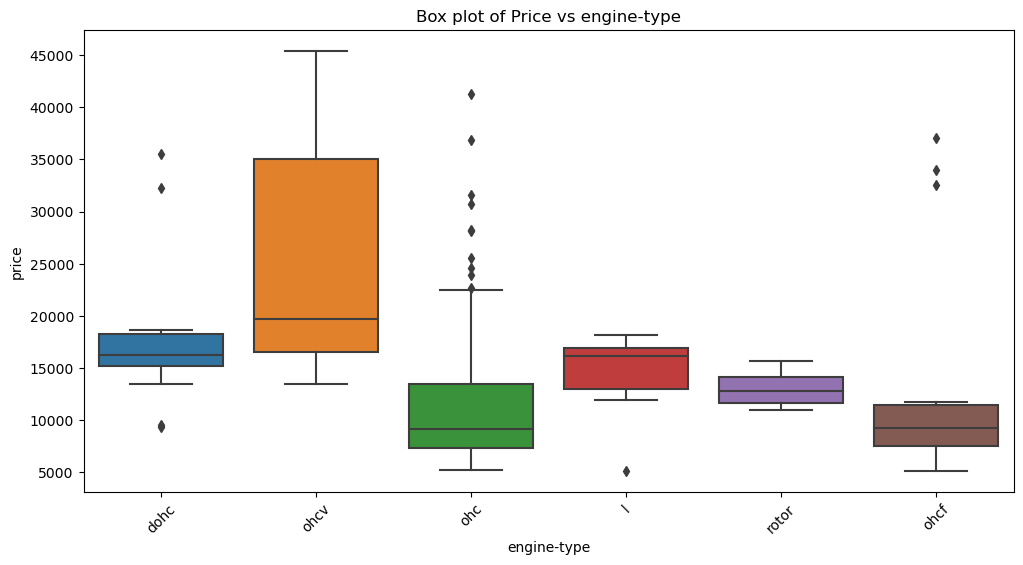

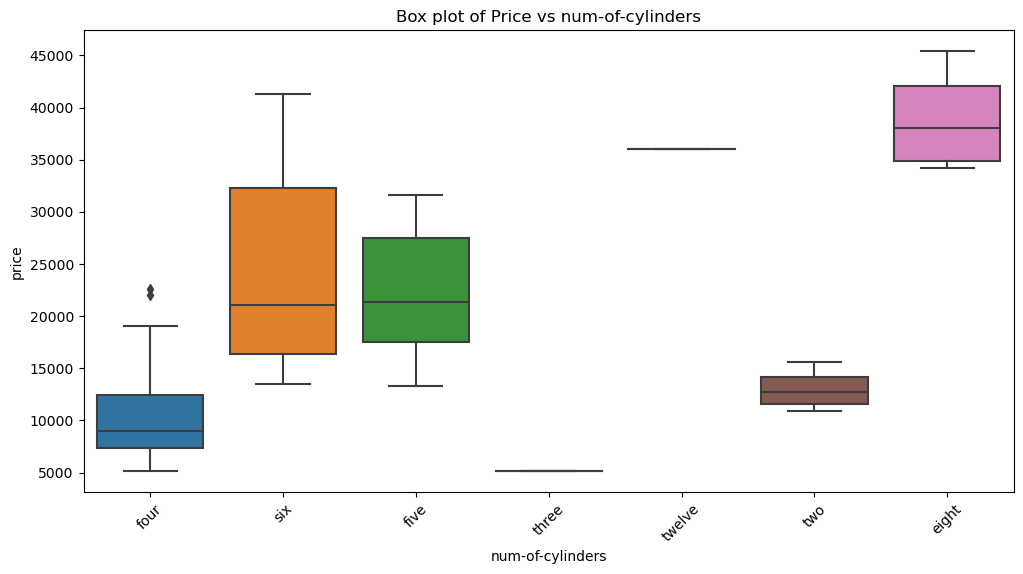

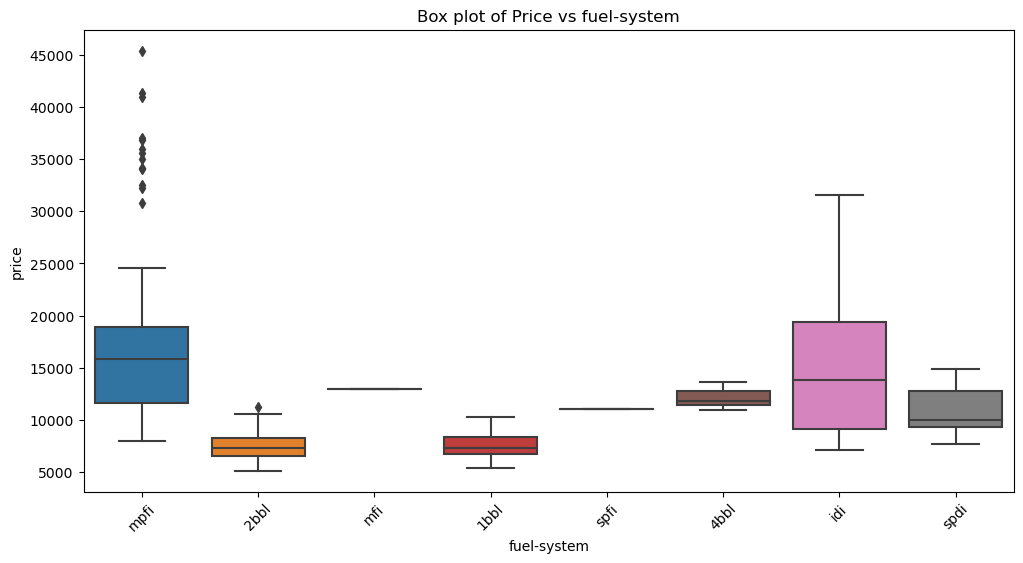

In [51]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()    #boxplot for all the categorical columns
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Box plot of Price vs {col}')
    plt.xticks(rotation=45)
    plt.show()

In [55]:

anova_results = {}
for col in categorical_columns:
    groups = [df['price'][df[col] == level] for level in df[col].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[col] = {'F-Value': f_val, 'P-Value': p_val}
    anova_df = pd.DataFrame(anova_results).T
print("ANOVA Results:\n")
print(anova_df)

ANOVA Results:

                    F-Value       P-Value
make              33.232103  1.068343e-50
fuel-type          2.452020  1.189625e-01
aspiration         6.631286  1.074585e-02
num-of-doors       0.358997  5.497451e-01
body-style         9.128752  8.779795e-07
drive-wheels      67.954065  3.394544e-23
engine-location   24.495550  1.583490e-06
engine-type        9.845111  2.086549e-08
num-of-cylinders  54.943653  2.870145e-39
fuel-system       15.024444  1.314258e-15


In Regplot , if increasing or decreasing line , that attribute is important . If it's constant , then it's not important . Secondly , if more density around the line , then it's more important 
In boxplot , if the more they overlap , the less is it's importance.
Pearson Correlation is for verifying regplot 
ANOVA is for verfying boxplot , the more F value , the less P value is more important feature .

In this data , 
1. Important numerical columns :- wheel-base , length , width , crub-weight , engine-size ,bore , horsepower, city-mpg, highway-mpg
2. Important categorical columns:- make, drive-wheels ,engine-location, num-of-cylinders